In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# parallel 10x10 data   a    b    c    d    e    f    g    h     i     j
field_map1 = np.array([[1.36,1.52,1.92,2.82,5.08,6.70,8.37,9.89,10.38,10.58],#1
                       [0.98,0.81,0.54,2.70,4.89,6.91,9.42,11.58,11.11,11.0],#2
                       [0.57,0.29,0.00,2.49,4.93,7.30,9.66,12.03,11.70,11.35],#3
                       [0.39,0.16,0.00,2.49,4.98,7.35,9.66,12.03,11.86,11.60],#4
                       [0.29,0.08,0.00,2.46,4.92,7.05,9.70,12.03,11.96,11.67],#5
                       [0.28,0.06,0.00,2.50,4.60,6.87,9.50,12.03,11.94,11.64],#6
                       [0.40,0.14,0.00,2.57,4.58,6.94,9.40,12.03,11.75,11.47],#7
                       [0.64,0.33,0.00,2.62,4.69,6.90,9.45,12.03,11.43,11.16],#8
                       [1.10,1.01,1.22,2.89,5.00,6.88,8.90,10.69,10.68,10.64],#9
                       [1.54,1.76,2.43,3.35,5.14,6.77,8.17,9.30,9.92,10.16]])#10

# point 10x10 data       a   b   c   d   e   f   g   h   i   j
field_map2 = np.array([[3.3,3.7,4.1,4.7,5.5,6.2,7.1,7.6, 8.1, 8.5],#1
                       [3.0,3.4,3.8,4.5,5.5,6.4,7.3,8.0, 8.5, 8.8],#2
                       [2.6,2.9,3.3,4.2,5.4,6.5,7.5,8.5, 9.1, 9.3],#3
                       [2.0,2.0,2.3,3.7,5.3,6.8,8.2,9.5, 9.9, 9.8],#4
                       [1.4,0.5,1.5,3.5,5.4,7.3,9.2,10.5,11.2,10.3],#5
                       [1.4,0.4,1.2,3.4,5.5,7.7,9.4,11.0,11.2,10.4],#6
                       [1.9,2.0,2.7,4.2,5.9,7.6,9.2,9.9, 10.2,10.0],#7
                       [2.6,3.0,3.6,4.7,6.1,7.4,8.6,9.2, 9.6, 9.6],#8
                       [3.2,3.6,4.2,5.2,6.3,7.3,8.2,8.8, 9.2, 9.3],#9
                       [3.6,4.0,4.6,5.5,6.4,7.1,7.9,8.4, 8.9, 9.1]])#10

# mystery 10x10 data     a    b    c    d    e    f    g    h     i     j
field_map3 = np.array([[0.69,2.07,3.21,4.43,5.58,6.66,7.72,8.84,10.03,11.43],#1
                       [0.60,2.04,3.45,4.51,5.67,6.59,7.69,8.86,10.06,11.60],#2
                       [0.57,2.14,3.60,4.92,5.82,6.50,7.43,8.70,9.96,11.64],#3
                       [0.63,2.36,3.94,5.72,6.10,6.11,6.79,8.32,9.92,11.64],#4
                       [0.61,2.52,4.56,6.10,6.10,6.11,6.11,8.07,9.81,11.63],#5
                       [0.64,2.54,4.51,6.10,6.10,6.11,6.11,8.10,9.82,11.54],#6
                       [0.73,2.42,4.17,5.76,6.11,6.12,6.85,8.50,9.88,11.66],#7
                       [0.67,2.32,3.74,5.02,5.88,6.53,7.56,8.72,10.00,11.73],#8
                       [0.62,2.21,3.73,4.80,5.81,6.70,7.74,8.95,10.21,11.69],#9
                       [0.91,2.21,3.51,4.70,5.77,6.77,7.90,9.00,10.11,11.37]])#10

# pretty tedious huh? this is exactly what cameras do everyday.
# show some empathy before you snap. >:(


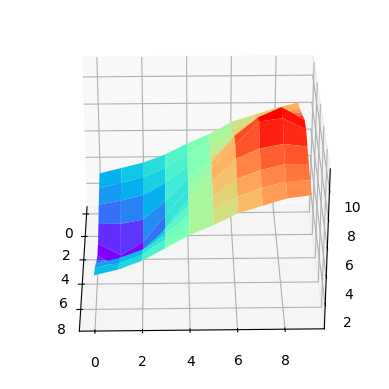

In [3]:
# intuitive potential difference analog (looks like hill)

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

X = [[i for j in range(10)] for i in range(10)]
Y = [[j for j in range(10)] for i in range(10)]
Z = field_map2


# Plot a basic wireframe
ax.plot_surface(X,Y,Z, cmap=cm.rainbow, rstride=1, cstride=1)
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)

# change the prams to rotate the plot (pitch (deg)+up -down, yaw (deg)+cw -ccw
#ax.view_init(20, 20)
#plt.show()

for ii in range(0, 360):
    ax.view_init(30, ii)
    plt.savefig("frames/movie{}.png".format(ii))


In [6]:
%%bash 
ffmpeg -r 30 -i frames/movie%d.png -c:v libx264 -vf fps=25 -pix_fmt yuv420p out2.mp4


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

In [7]:
%%bash
rm frames/*.png